In [1]:
import os
import matplotlib.pyplot as plt
import torchvision
import torch
import pandas as pd
import numpy as np

from data_loaders import CUB_CtoY_dataset

#Import perceptron model
from sklearn.linear_model import Perceptron

In [7]:
#test majority voted dataset
#set random seed
np.random.seed(1)
#Load the dataset
majority_config = {'CUB_dir':r'data/CUB_200_2011',
                'split_file':r'data/train_test_val.pkl',
                'use_majority_voting':True,
                'min_class_count':10,
                'return_visibility':False}

Majority_dataset_train = CUB_CtoY_dataset(mode="train",config_dict=majority_config,transform=None)

C_train = []
Y_train = []

for i in range(len(Majority_dataset_train)):
    Ct,Yt_ = Majority_dataset_train.__getitem__(i)
    C_train.append(Ct)
    Y_train.append(Yt_)

C_train = np.array(C_train)
Y_train = np.argmax(np.array(Y_train),axis=1) #Convert one hot encoding to class labels

#Train the perceptron model
perceptron_model = Perceptron()
perceptron_model.fit(C_train,Y_train)


Majority_dataset_test = CUB_CtoY_dataset(mode="test",config_dict=majority_config,transform=None)

C_test = []
Y_test = []

for i in range(len(Majority_dataset_test)):
    Ct,Yt_ = Majority_dataset_test.__getitem__(i)
    C_test.append(Ct)
    Y_test.append(Yt_)

C_test = np.array(C_test)
Y_test = np.argmax(np.array(Y_test),axis=1) #Convert one hot encoding to class labels

#Test the perceptron model
score = perceptron_model.score(C_test,Y_test)
print("Perceptron model accuracy: ",score)
#Se if correct is in the top 5
top5 = np.argsort(perceptron_model.decision_function(C_test),axis=1)[:,-5:]

correct = 0
for i in range(len(Y_test)):
    if Y_test[i] in top5[i]:
        correct += 1

print("Top 5 accuracy: ",correct/len(Y_test))

Perceptron model accuracy:  1.0
Top 5 accuracy:  1.0


In [9]:
#test majority voted dataset

#set random seed
np.random.seed(1)

#Load the dataset
NoNmajority_config = {'CUB_dir':r'data/CUB_200_2011',
                'split_file':r'data/train_test_val.pkl',
                'use_majority_voting':False,
                'min_class_count':10,
                'return_visibility':False}

NoNMajority_dataset_train = CUB_CtoY_dataset(mode="train",config_dict=NoNmajority_config,transform=None)

C_train = []
Y_train = []

for i in range(len(NoNMajority_dataset_train)):
    Ct,Yt_ = NoNMajority_dataset_train.__getitem__(i)
    C_train.append(Ct)
    Y_train.append(Yt_)

C_train = np.array(C_train)
Y_train = np.argmax(np.array(Y_train),axis=1) #Convert one hot encoding to class labels

#Train the perceptron model
perceptron_model = Perceptron()
perceptron_model.fit(C_train,Y_train)


NoNMajority_dataset_test = CUB_CtoY_dataset(mode="test",config_dict=NoNmajority_config,transform=None)

C_test = []
Y_test = []

for i in range(len(NoNMajority_dataset_test)):
    Ct,Yt_ = NoNMajority_dataset_test.__getitem__(i)
    C_test.append(Ct)
    Y_test.append(Yt_)

C_test = np.array(C_test)
Y_test = np.argmax(np.array(Y_test),axis=1) #Convert one hot encoding to class labels

#Test the perceptron model
score = perceptron_model.score(C_test,Y_test)
print("Perceptron model accuracy: ",score)

#Se if correct is in the top 5
top5 = np.argsort(perceptron_model.decision_function(C_test),axis=1)[:,-5:]

correct = 0
for i in range(len(Y_test)):
    if Y_test[i] in top5[i]:
        correct += 1

print("Top 5 accuracy: ",correct/len(Y_test))

Perceptron model accuracy:  0.37348981705212286
Top 5 accuracy:  0.6216775975146703


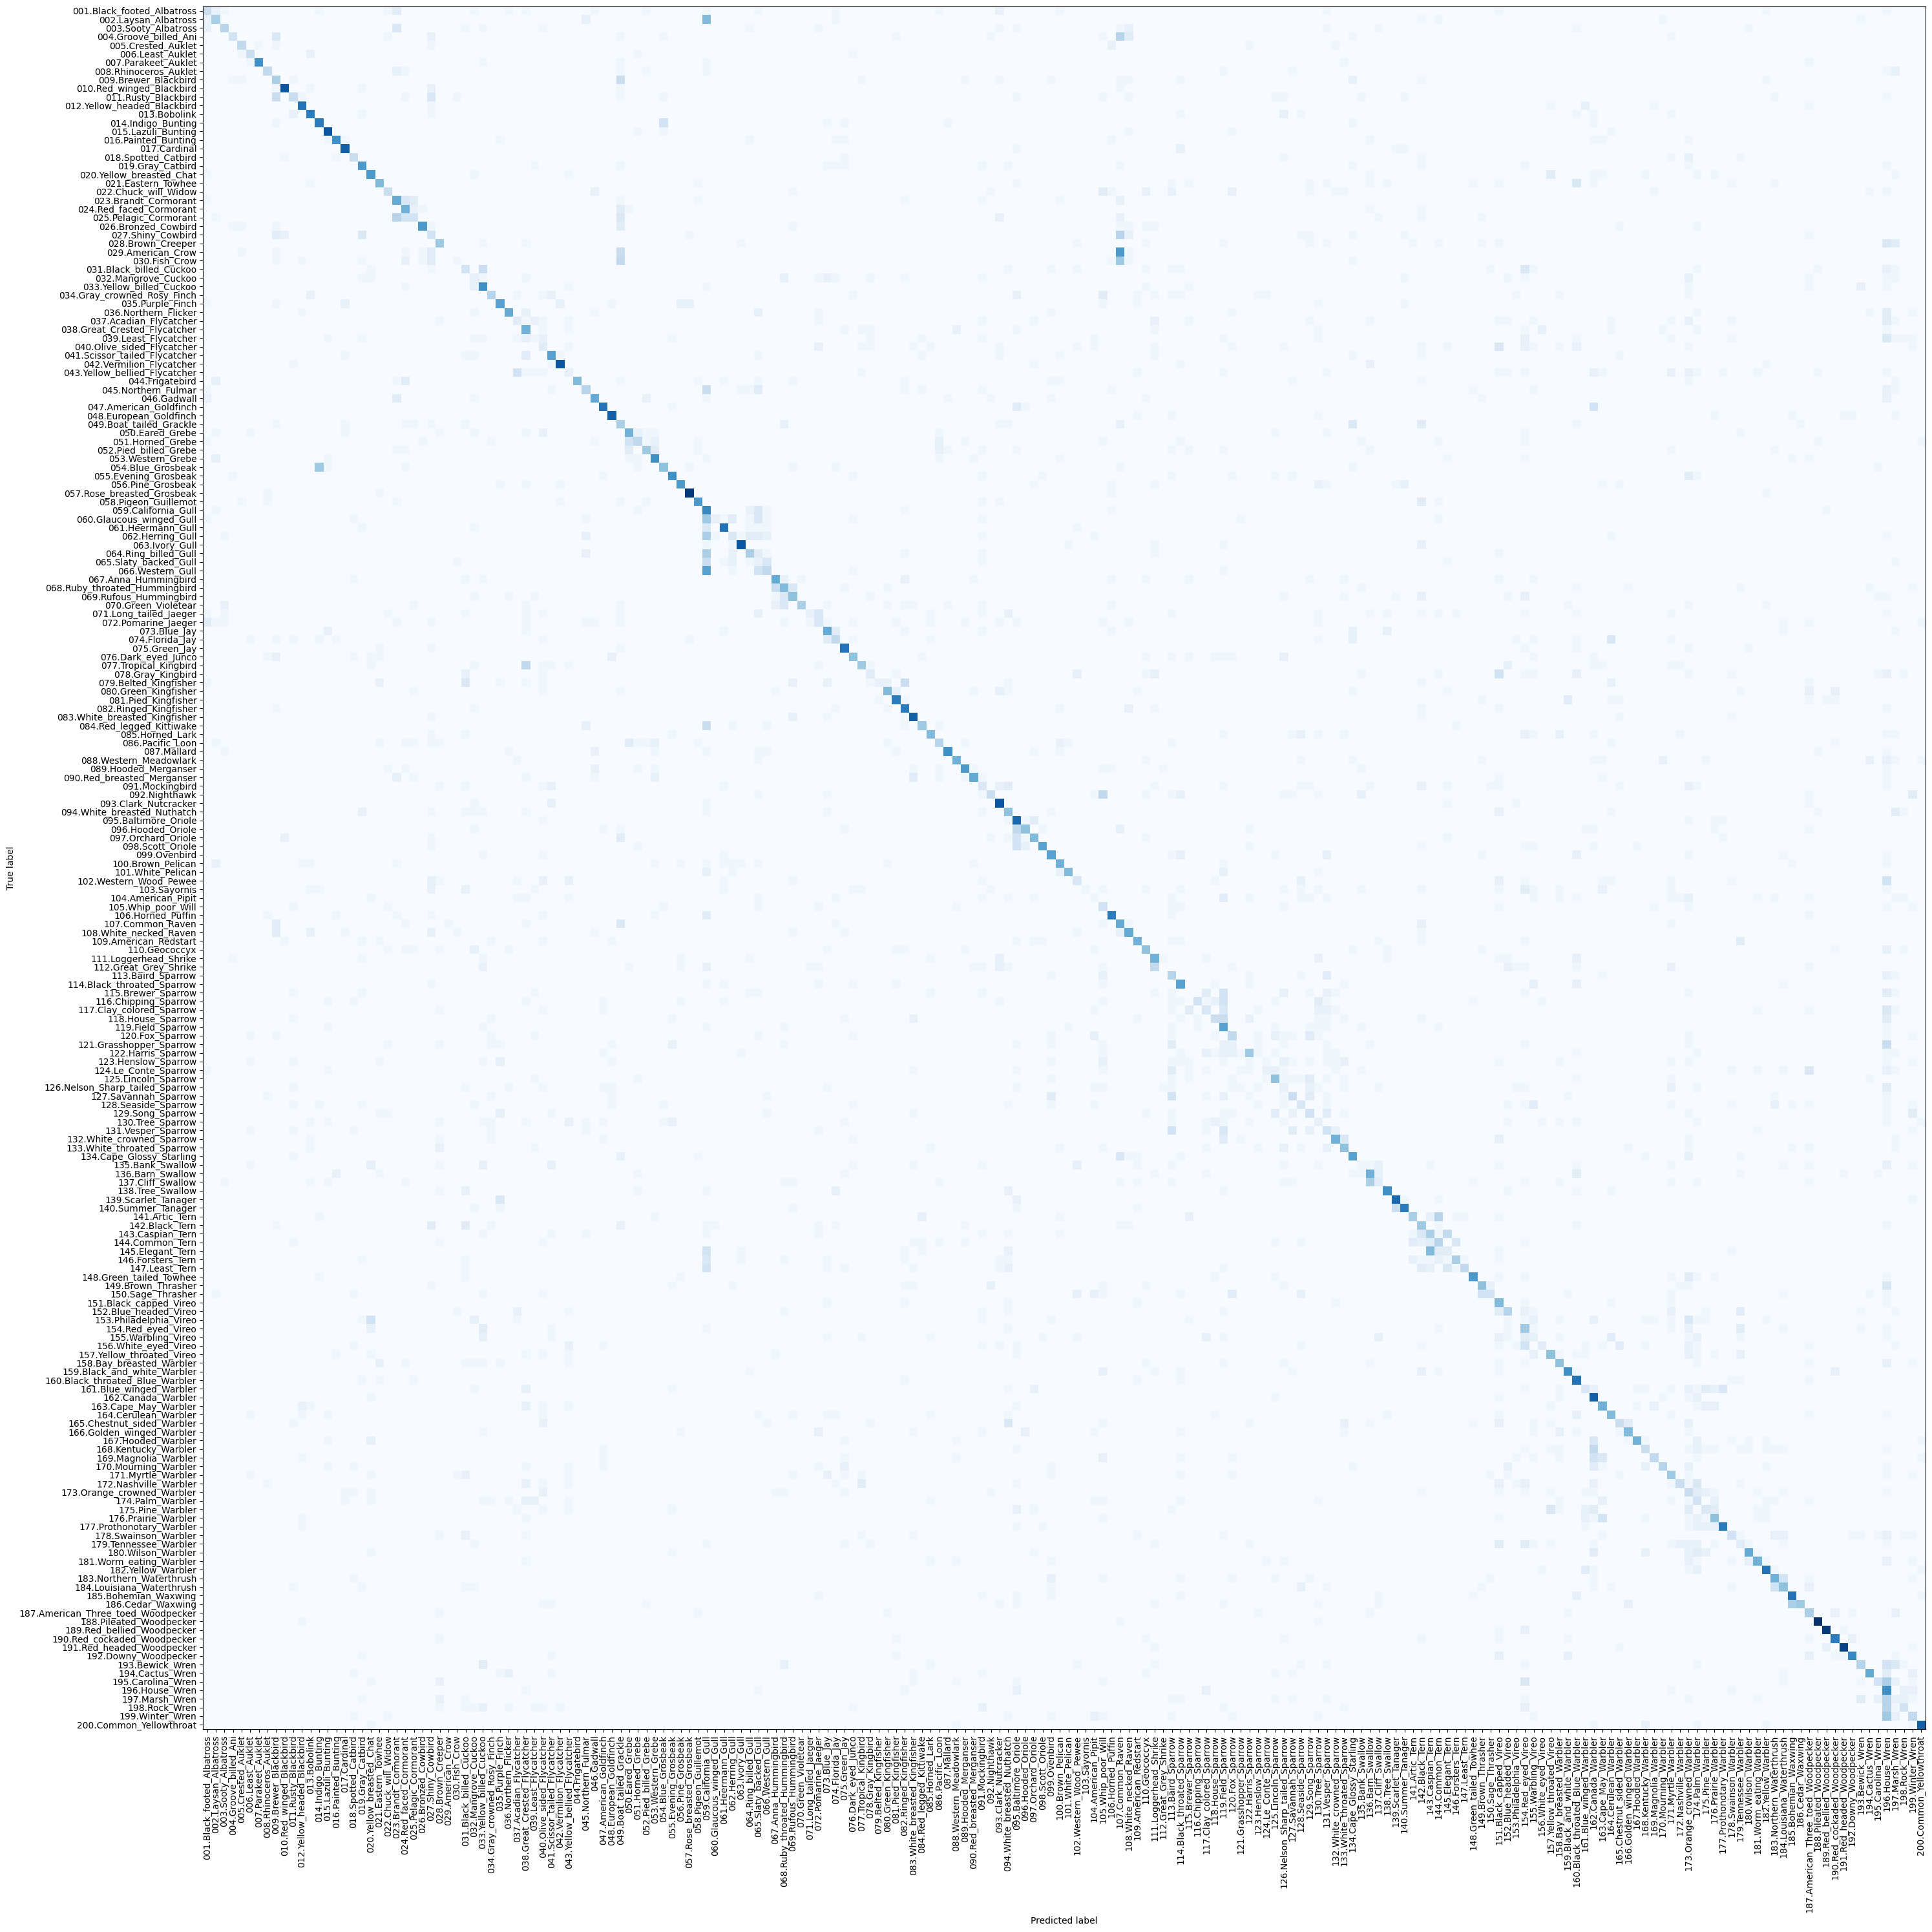

In [10]:
def plot_confusion_matrix(cm, classes, output_dir):
    """
    Plot and save the confusion matrix.

    Args:
        cm (np.array): Confusion matrix.
        classes (list): List of class names.
        output_dir (Path): Directory to save the plot.
    """
    plt.figure(figsize=(30, 30))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout() 
    plt.show()

#Confusion matrix
Y_hat = perceptron_model.predict(C_test)
cm = np.zeros((200,200))
for i in range(len(Y_test)):
    cm[Y_test[i],Y_hat[i]] += 1
class_labels_names = pd.read_csv(os.path.join(r"data\CUB_200_2011\classes.txt"), sep=" ", header=None)[1].values

plot_confusion_matrix(cm,class_labels_names,r"output")

In [5]:
#Import neural network model from sklearn
from sklearn.neural_network import MLPClassifier
#set random seed
np.random.seed(1)

#Train the perceptron model
model = MLPClassifier(hidden_layer_sizes=(200,200),max_iter=1000)
model.fit(C_train,Y_train)


NoNMajority_dataset_Val = CUB_CtoY_dataset(mode="val",config_dict=NoNmajority_config,transform=None)

C_test = []
Y_test = []

for i in range(len(NoNMajority_dataset_Val)):
    Ct,Yt_ = NoNMajority_dataset_Val.__getitem__(i)
    C_test.append(Ct)
    Y_test.append(Yt_)

C_test = np.array(C_test)
Y_test = np.argmax(np.array(Y_test),axis=1) #Convert one hot encoding to class labels

#Test the perceptron model
score = model.score(C_test,Y_test)
print("Model accuracy: ",score)

#Se if correct is in the top 5
top5 = np.argsort(model.predict_proba(C_test),axis=1)[:,-5:]
top5 = np.flip(top5,axis=1) #Flip the array so that the highest probability is first
top = np.argmax(model.predict_proba(C_test),axis=1) #Get the top prediction

correct = 0
for i in range(len(Y_test)):
    if Y_test[i] in top5[i]:
        correct += 1

print("Top 5 accuracy: ",correct/len(Y_test))

Model accuracy:  0.42153589315525875
Top 5 accuracy:  0.7170283806343907


In [6]:
# Random forest
#set random seed
np.random.seed(1)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(C_train,Y_train)

score = model.score(C_test,Y_test)
print("Model accuracy: ",score)

Model accuracy:  0.4048414023372287
